## Dataset Preparation

We will calculate molecular fingerprints that describe the compounds in the dataset

In [1]:
import pandas as pd

In [2]:
bioactivity_data = pd.read_csv("bioactivity_data_3_classes_pIC50.csv")
bioactivity_data

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,MolLogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL185238,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,inactive,287.326,3.39032,1,4,4.795880
1,CHEMBL371694,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,active,295.361,4.57530,1,2,6.045757
2,CHEMBL200259,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,intermediate,327.387,4.29800,2,3,5.799971
3,CHEMBL68215,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,active,313.360,4.51130,2,3,6.469800
4,CHEMBL200863,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,active,496.398,6.25040,4,4,7.886057
...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,active,520.562,3.95870,3,8,8.200659
4844,CHEMBL5197265,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,active,562.599,4.33490,3,8,8.119186
4845,CHEMBL5193921,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,active,446.602,3.75520,2,7,7.920819
4846,CHEMBL5178459,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,intermediate,424.508,4.40370,1,6,5.751046


In [3]:
molecule_data = bioactivity_data[['canonical_smiles', 'molecule_chembl_id']]
molecule_data

,canonical_smiles,molecule_chembl_id
0,Cc1cccc(-c2n[nH]cc2-c2ccc3ncccc3n2)n1,CHEMBL185238
1,CC(C)(C)c1nc(-c2ccc(F)cc2)c(-c2ccncc2)[nH]1,CHEMBL371694
2,OCc1cccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)c1,CHEMBL200259
3,Oc1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,CHEMBL68215
4,CC(C)(CNC(=O)Nc1ccc(Cl)cc1)c1nc(-c2ccc(Cl)c(O)...,CHEMBL200863
...,...,...
4843,NCCCc1nc(-c2cccc(NS(=O)(=O)c3cc(F)ccc3F)c2F)c(...,CHEMBL5195570
4844,CC(=O)Nc1nccc(-c2sc(CCCN)nc2-c2cccc(NS(=O)(=O)...,CHEMBL5197265
4845,CCN(C)S(=O)(=O)Nc1cccc(-c2nc(C(C)(C)C)sc2-c2cc...,CHEMBL5193921
4846,C[C@@H]1COCCN1c1nc(-c2cccc3[nH]ccc23)nc2ccc(-c...,CHEMBL5178459


In [4]:
# PaDEL input file
molecule_data.to_csv('molecule.smi', sep='\t', index=False, header=False)

Calculate fingerprint descriptors for each molecule using PaDEL

In [53]:
! bash padel.sh

Load PaDEL output and prepare X and y data

In [5]:
descriptors = pd.read_csv('descriptors_output.csv')
descriptors.rename(columns={'Name': 'molecule_chembl_id'}, inplace=True)
descriptors

,molecule_chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL371694,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL185238,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL68215,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL200259,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL381447,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4844,CHEMBL5193921,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4845,CHEMBL5197265,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4846,CHEMBL5178459,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
reduced_bioactivity_data = bioactivity_data[['molecule_chembl_id', 'pIC50']]
reduced_bioactivity_data

,molecule_chembl_id,pIC50
0,CHEMBL185238,4.795880
1,CHEMBL371694,6.045757
2,CHEMBL200259,5.799971
3,CHEMBL68215,6.469800
4,CHEMBL200863,7.886057
...,...,...
4843,CHEMBL5195570,8.200659
4844,CHEMBL5197265,8.119186
4845,CHEMBL5193921,7.920819
4846,CHEMBL5178459,5.751046


In [7]:
X_y_df = pd.merge(descriptors, reduced_bioactivity_data, on='molecule_chembl_id')
X_y_df

,molecule_chembl_id,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL371694,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.045757
1,CHEMBL185238,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.795880
2,CHEMBL68215,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.469800
3,CHEMBL200259,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.799971
4,CHEMBL381447,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.853872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,CHEMBL5195570,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.200659
4844,CHEMBL5193921,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.920819
4845,CHEMBL5197265,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.119186
4846,CHEMBL5178459,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.751046


In [8]:
X_y_df.to_csv('pubchem_fingerprints_data.csv', index=False)

In [9]:
X_y_df.drop(columns='molecule_chembl_id', inplace=True)

We will build a regression model for predicting the bioactivity of different compounds against BRAF using the random forest algorithm.

In [10]:
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
X_y_df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.795880
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.469800
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.799971
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.853872


We will split the dataset into input features (X) and output feature (y).

In [12]:
X = X_y_df.drop('pIC50', axis=1)
X.shape

(4848, 881)

In [13]:
y = X_y_df.pIC50
y.shape

(4848,)

We will remove features with low variance to reduce the dimensionality without losing relevant information

In [27]:
selector = VarianceThreshold(threshold=0.1)    
X = selector.fit_transform(X)
X.shape

(4848, 214)

We will split the data in 80/20 ratio (training/testing)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# training set
X_train.shape, y_train.shape

((3878, 214), (3878,))

In [30]:
# testing set
X_test.shape, y_test.shape

((970, 214), (970,))

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

0.7406674992384474

In [34]:
y_pred = model.predict(X_test)

c:\Users\ferna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

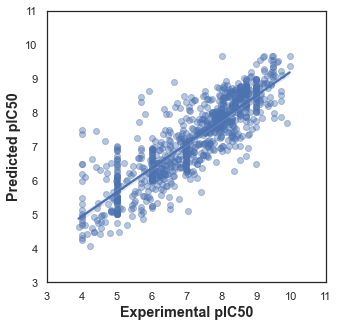

In [35]:
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 11)
ax.set_ylim(3, 11)
ax.figure.set_size_inches(5, 5)
plt.show

An R2 value of 74.06% suggests a considerable predictive power, indicating that the model explains a substantial portion of the variability in the response variable (pIC50). However, there is still room for improvement. For this reason, we are going to compare the performance of several machine learning algorithms for building regression models of BRAF inhibitors.

In [36]:
from lazypredict.Supervised import LazyRegressor

We will use the same previous training/testing data partition

In [37]:
X_train.shape, y_train.shape

((3878, 214), (3878,))

In [38]:
X_test.shape, y_test.shape

((970, 214), (970,))

In [39]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/41 [00:00<?, ?it/s]

 98%|█████████▊| 40/41 [01:11<00:01,  1.01s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 3878, number of used features: 214
[LightGBM] [Info] Start training from score 7.111947


100%|██████████| 41/41 [01:12<00:00,  1.77s/it]


In [40]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.68,0.75,0.70,0.68
RandomForestRegressor,0.67,0.74,0.71,7.55
HistGradientBoostingRegressor,0.66,0.73,0.72,5.21
LGBMRegressor,0.66,0.73,0.72,1.23
BaggingRegressor,0.64,0.72,0.74,1.09
SVR,0.63,0.71,0.75,3.91
NuSVR,0.62,0.71,0.75,3.32
KNeighborsRegressor,0.59,0.68,0.78,0.30
MLPRegressor,0.59,0.68,0.79,7.43


We are building 41 regression models with default parameters. We could perform hyperparameter tuning to try to improve the obtained results of the models of interest.

## Visualization of model performance

In [41]:
import matplotlib.pyplot as plt

### R-Squared

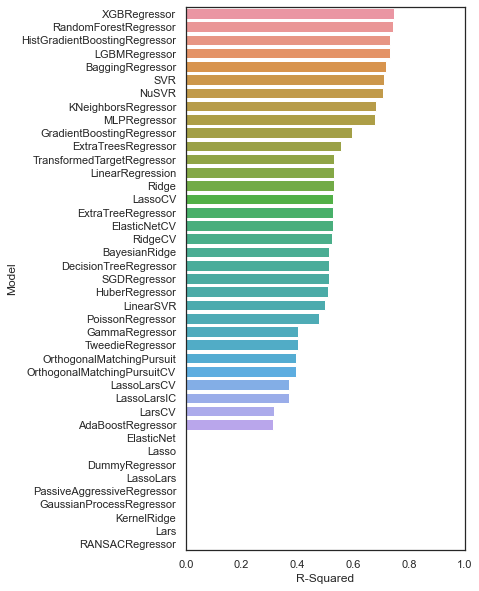

In [45]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(data=predictions, x='R-Squared', y=predictions.index)
# Set limit from 0 to 1
ax.set(xlim=(0,1))
plt.savefig('R_Squared_barplot.pdf')

### RMSE

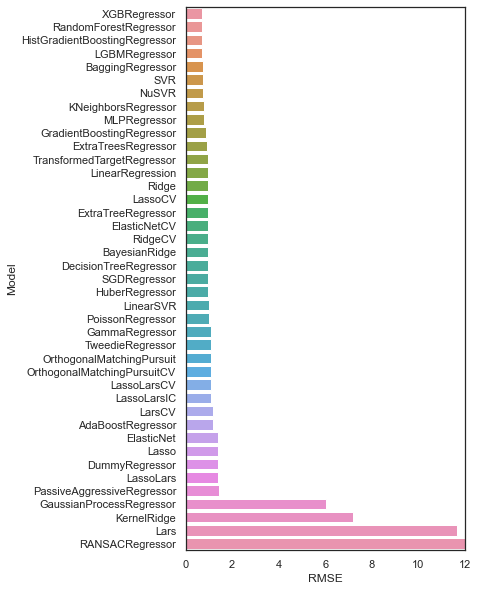

In [47]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(data=predictions, x='RMSE', y=predictions.index)
ax.set(xlim=(0,12))
plt.savefig('RMSE_barplot.pdf')


### Model Time

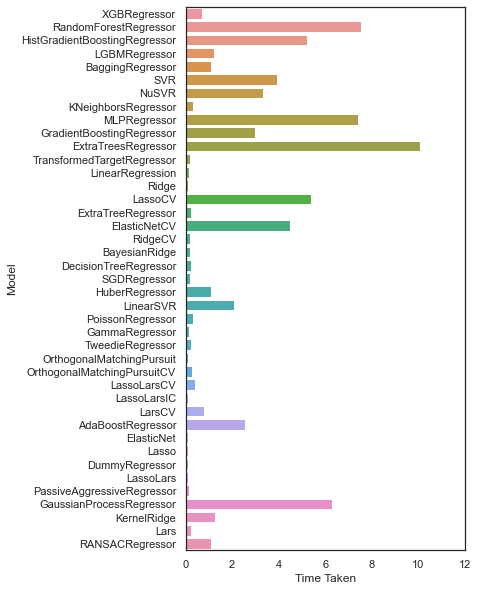

In [50]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(data=predictions, x='Time Taken', y=predictions.index)
ax.set(xlim=(0,12))
plt.savefig('Model_time_barplot.pdf')


The XGB Regressor has the best performance with an R-Squared of 0.75. Hyperparameter tuning could be applied to this model in order to further improve its performance. Afterwards, it could be used to take as input new molecules and predict their inhibition bioactivity towards BRAF.